<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./dls1/train.csv')
test = pd.read_csv('./dls1/test.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# YOUR CODE
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [28]:
# посмотрим 10 случайных строк
data.iloc[np.random.uniform(0,len(data),10)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3166,5,79.90,343.95,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
2778,1,75.55,75.55,Female,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,0
4018,49,56.30,2780.6,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
4637,35,61.00,2130.45,Male,0,Yes,No,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,0
1027,33,86.15,2745.7,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Credit card (automatic),1
4259,71,109.60,7854.15,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
3626,71,113.65,8166.8,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
4573,29,84.90,2516.2,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0
3666,1,85.55,85.55,Female,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),1
3279,2,30.90,59.05,Female,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [32]:
# кол-во NaN в каждом столбце
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [33]:
# убедились что NaN отсутствуют 

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [37]:
# YOUR CODE
#TotalSpent имеет числовые значения но тип object и выдает ошибку при попытке перевода во float, причина в значения ' '
data[data['TotalSpent'] == ' ']['TotalSpent'].count()
# посчитаем кол-во таких строк

9

In [5]:
# заменим эти значения на '0'
data['TotalSpent'] = data['TotalSpent'].replace(' ', '0')
# теперь можем перевести данные в числовой тип
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [6]:
# аналогично для тестовой выборки
test['TotalSpent'] = test['TotalSpent'].replace(' ', '0')
test['TotalSpent'] = test['TotalSpent'].astype(float)

No handles with labels found to put in legend.


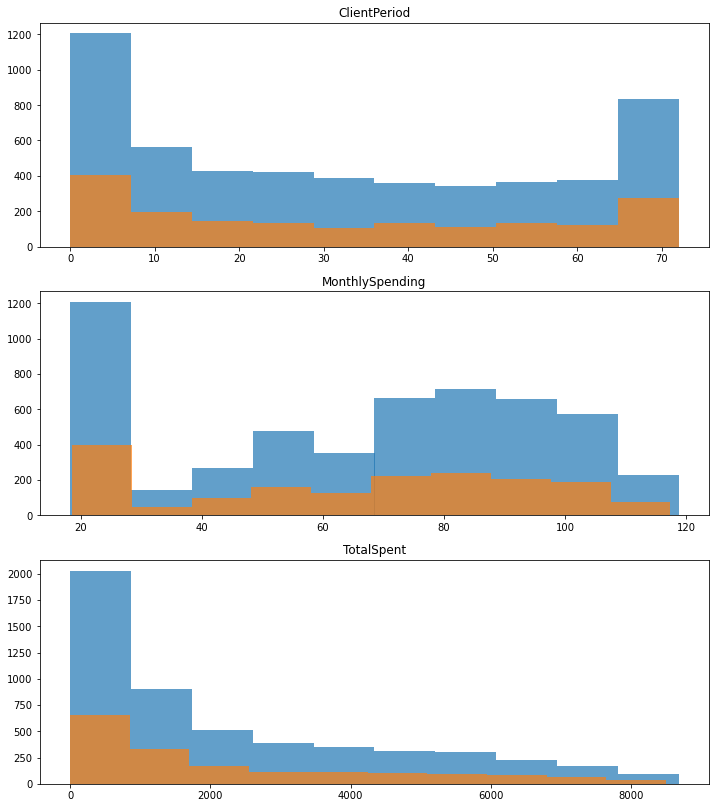

In [51]:
# построим распределения для числовых признаков
fig, ax = plt.subplots()

plt.subplot(3, 1, 1)
plt.hist(data['ClientPeriod'],alpha = 0.7)
plt.hist(test['ClientPeriod'],alpha = 0.7)
plt.title(label = 'ClientPeriod')

plt.subplot(3, 1, 2)
plt.hist(data['MonthlySpending'],alpha = 0.7)
plt.hist(test['MonthlySpending'],alpha = 0.7)
plt.title(label = 'MonthlySpending')


plt.subplot(3, 1, 3)
plt.hist(data['TotalSpent'],alpha = 0.7)
plt.hist(test['TotalSpent'],alpha = 0.7)
plt.title(label = 'TotalSpent')


fig.set_figwidth(12)    
fig.set_figheight(14)
ax.legend(prop={"size":14})
plt.show()

In [52]:
# Синий цвет имеют данные из train, желтый из test, можно хорошо видеть что распределения значения на train и test близки



In [88]:
# Рассмотрим бинарные признаки 

No handles with labels found to put in legend.


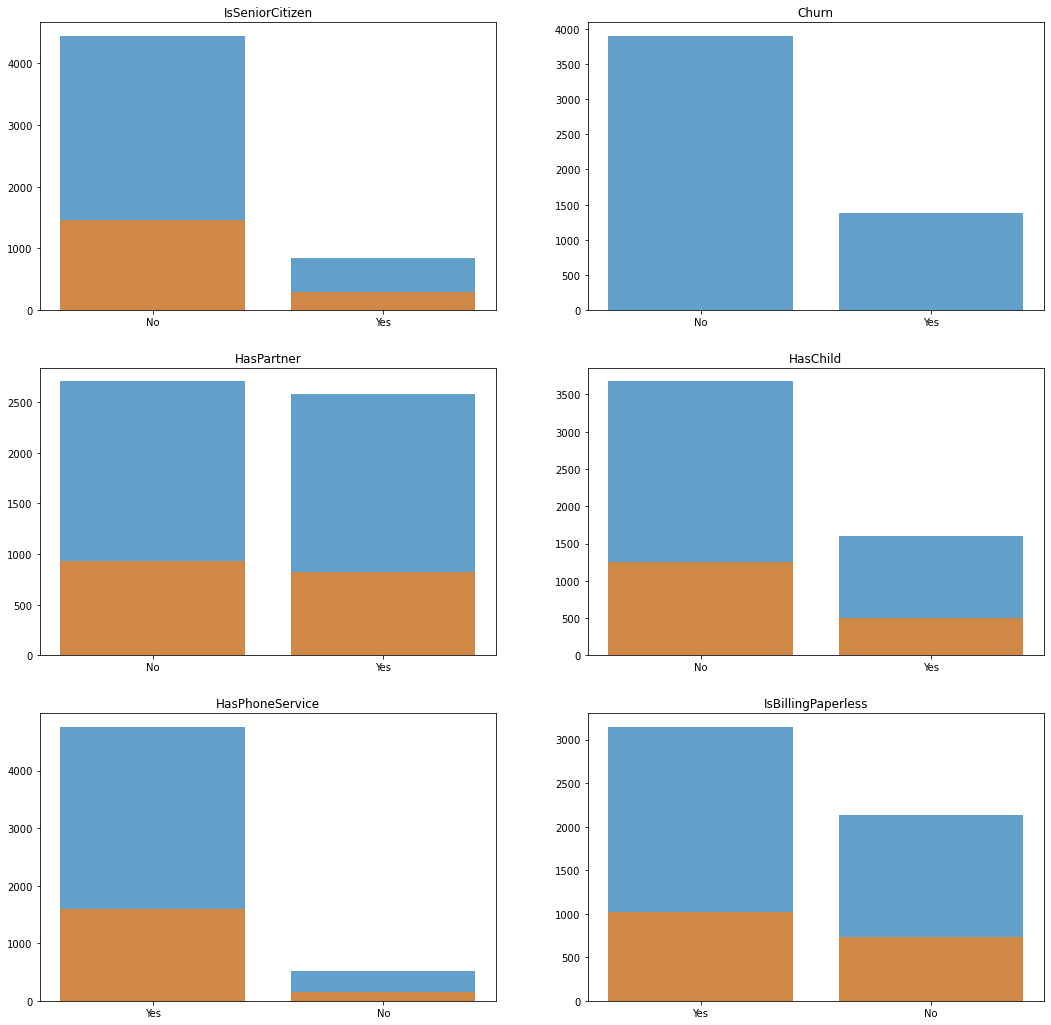

In [166]:
fig, ax = plt.subplots()
plt.subplot(3, 2, 1)
plt.bar(['No','Yes'],data['IsSeniorCitizen'].value_counts(),alpha = 0.7)
plt.bar(['No','Yes'],test['IsSeniorCitizen'].value_counts(), alpha = 0.7)
plt.title(label = 'IsSeniorCitizen')

plt.subplot(3, 2,2)
plt.bar(['No','Yes'],data['Churn'].value_counts(),alpha = 0.7)
plt.title(label = 'Churn')

plt.subplot(3, 2, 3)
plt.bar(data['HasPartner'].value_counts().index,data['HasPartner'].value_counts(),alpha = 0.7)
plt.bar(data['HasPartner'].value_counts().index,test['HasPartner'].value_counts(), alpha = 0.7)
plt.title(label = 'HasPartner')

plt.subplot(3, 2, 4)
plt.bar(data['HasChild'].value_counts().index,data['HasChild'].value_counts(),alpha = 0.7)
plt.bar(data['HasChild'].value_counts().index,test['HasChild'].value_counts(), alpha = 0.7)
plt.title(label = 'HasChild')

plt.subplot(3, 2, 5)
plt.bar(data['HasPhoneService'].value_counts().index,data['HasPhoneService'].value_counts(),alpha = 0.7)
plt.bar(data['HasPhoneService'].value_counts().index,test['HasPhoneService'].value_counts(), alpha = 0.7)
plt.title(label = 'HasPhoneService')

plt.subplot(3, 2, 6)
plt.bar(data['IsBillingPaperless'].value_counts().index,data['IsBillingPaperless'].value_counts(),alpha = 0.7)
plt.bar(data['IsBillingPaperless'].value_counts().index,test['IsBillingPaperless'].value_counts(), alpha = 0.7)
plt.title(label = 'IsBillingPaperless')


fig.set_figwidth(18)    
fig.set_figheight(18)
ax.legend(prop={"size":14})
plt.show()

In [99]:
# Для остальных категориальных признаков (Разделено на 2 вывода, для удобства просмотра)

No handles with labels found to put in legend.


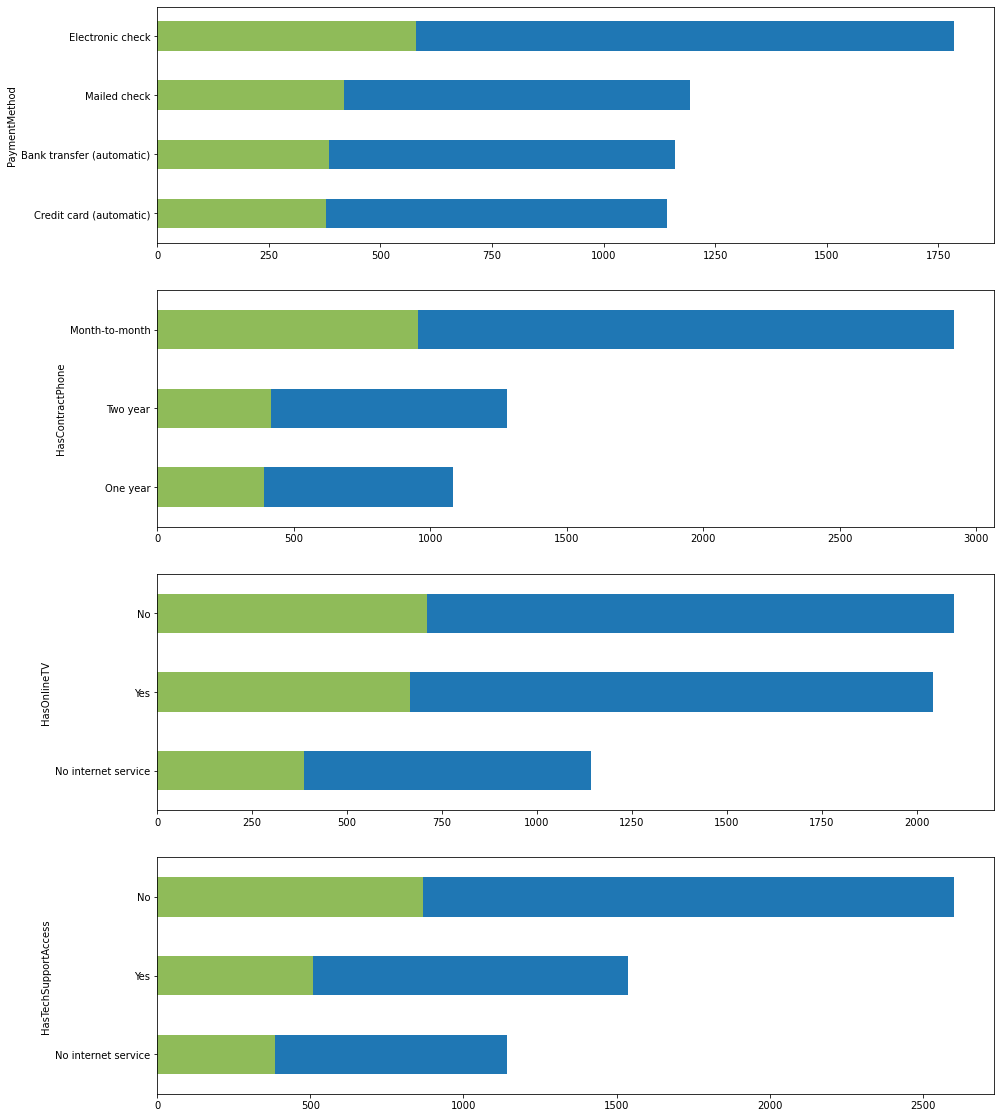

In [120]:
fig, ax = plt.subplots()

plt.subplot(4, 1,1)
data.groupby("PaymentMethod")["PaymentMethod"].count().sort_values().plot(kind="barh")
test.groupby("PaymentMethod")["PaymentMethod"].count().sort_values().plot(kind="barh",color = 'yellow',alpha = 0.5)

plt.subplot(4, 1,2)
data.groupby("HasContractPhone")["HasContractPhone"].count().sort_values().plot(kind="barh")
test.groupby("HasContractPhone")["HasContractPhone"].count().sort_values().plot(kind="barh",color = 'yellow',alpha = 0.5)

plt.subplot(4, 1,3)
data.groupby("HasOnlineTV")["HasOnlineTV"].count().sort_values().plot(kind="barh")
test.groupby("HasOnlineTV")["HasOnlineTV"].count().sort_values().plot(kind="barh",color = 'yellow',alpha = 0.5)

plt.subplot(4, 1,4)
data.groupby("HasTechSupportAccess")["HasTechSupportAccess"].count().sort_values().plot(kind="barh")
test.groupby("HasTechSupportAccess")["HasTechSupportAccess"].count().sort_values().plot(kind="barh",color = 'yellow',alpha = 0.5)

fig.set_figwidth(15)    
fig.set_figheight(20)
ax.legend(prop={"size":10})
plt.show()

In [ ]:
# Распределения также схожи

In [154]:
# Также построим альтернативный вариант круговыми диаграммами

No handles with labels found to put in legend.


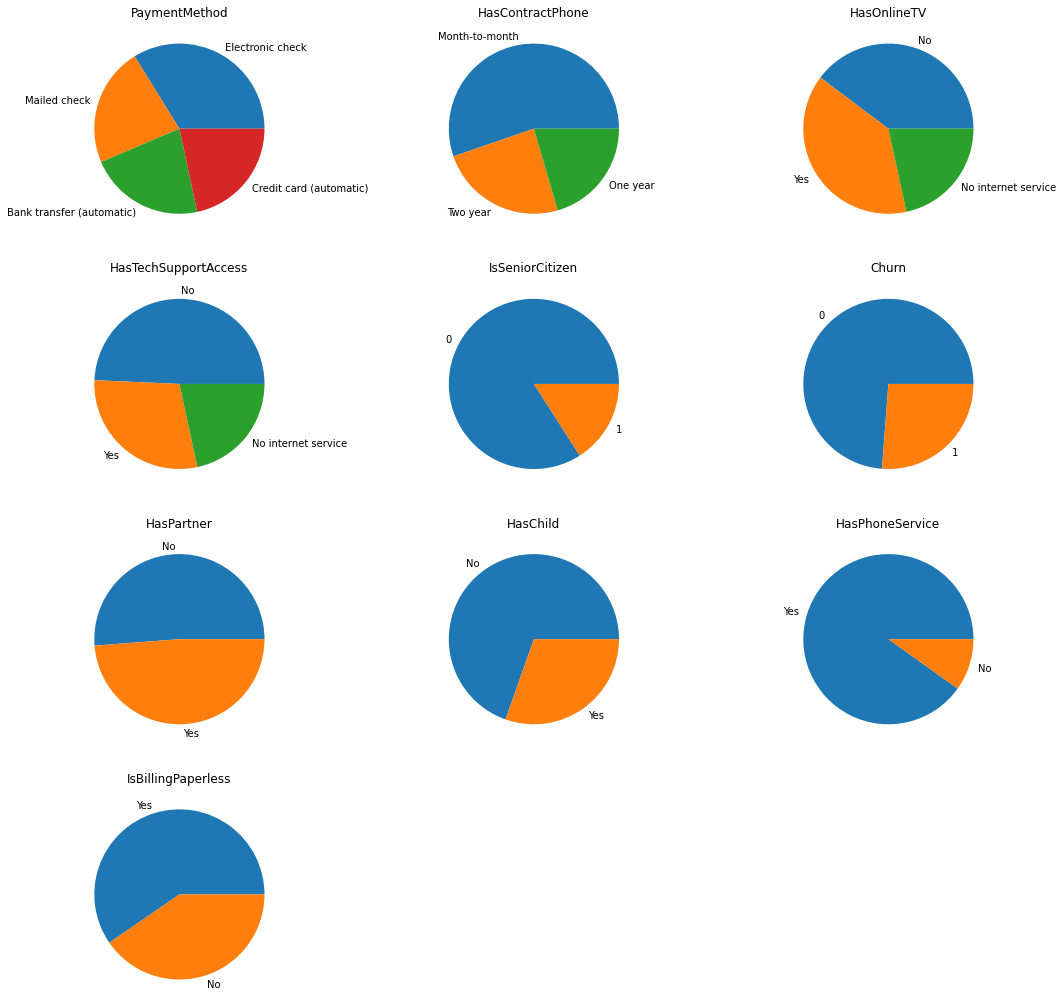

In [167]:
fig, ax = plt.subplots()

plt.subplot(4, 3,1)
plt.pie(data['PaymentMethod'].value_counts(), labels = data['PaymentMethod'].value_counts().index)
plt.title(label = 'PaymentMethod')

plt.subplot(4, 3,2)
plt.pie(data['HasContractPhone'].value_counts(), labels = data['HasContractPhone'].value_counts().index)
plt.title(label = 'HasContractPhone')

plt.subplot(4, 3,3)
plt.pie(data['HasOnlineTV'].value_counts(), labels = data['HasOnlineTV'].value_counts().index)
plt.title(label = 'HasOnlineTV')

plt.subplot(4, 3,4)
plt.pie(data['HasTechSupportAccess'].value_counts(), labels = data['HasTechSupportAccess'].value_counts().index)
plt.title(label = 'HasTechSupportAccess')

plt.subplot(4, 3, 5)
plt.pie(data['IsSeniorCitizen'].value_counts(), labels = data['IsSeniorCitizen'].value_counts().index)
plt.title(label = 'IsSeniorCitizen')

plt.subplot(4, 3,6)
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].value_counts().index)
plt.title(label = 'Churn')

plt.subplot(4, 3, 7)
plt.pie(data['HasPartner'].value_counts(), labels = data['HasPartner'].value_counts().index)
plt.title(label = 'HasPartner')

plt.subplot(4, 3, 8)
plt.pie(data['HasChild'].value_counts(), labels = data['HasChild'].value_counts().index)
plt.title(label = 'HasChild')

plt.subplot(4, 3, 9)
plt.pie(data['HasPhoneService'].value_counts(), labels = data['HasPhoneService'].value_counts().index)
plt.title(label = 'HasPhoneService')

plt.subplot(4, 3, 10)
plt.pie(data['IsBillingPaperless'].value_counts(), labels = data['IsBillingPaperless'].value_counts().index)
plt.title(label = 'IsBillingPaperless')

fig.set_figwidth(18)    
fig.set_figheight(18)
ax.legend(prop={"size":15})
plt.show()

Text(0.5, 1.0, 'Churn')

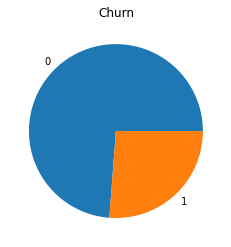

In [465]:
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].value_counts().index)
plt.title(label = 'Churn')

In [468]:
data['Churn'].value_counts()[0]/(data['Churn'].value_counts()[0]+data['Churn'].value_counts()[1])

0.7379780386217342

In [ ]:
# Относительной целевой переменной имеем отношение 74% к 26% что является допустимым дисбалансом 
#не требующим дополнительных мер.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [168]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [440]:
# YOUR CODE
#data preparing

X_num = data[num_cols]
Scaler = StandardScaler()
Scaler.fit(X_num)
X_num_norm = Scaler.transform(X_num)

X_cat = data[cat_cols]
X_cat_oh = []
Encoders= []
for i in cat_cols:
    LE = LabelEncoder()
    LE.fit(X_cat[i])
    x_cat_l = LE.transform(X_cat[i]).reshape(-1,1)

    OHE = OneHotEncoder()
    OHE.fit(x_cat_l)
    X_cat_oh.append(OHE.transform(x_cat_l).toarray())
    
    Encoders.append([LE,OHE])
X_cat_oh = np.concatenate(X_cat_oh,axis = 1)


In [441]:
train = np.concatenate([X_num,X_cat_oh],axis = 1)
train_labels = data[target_col]

In [442]:
Cs = [0.001,0.01,0.1,1.0,10,100,1000]

In [443]:
#model 
clf = LogisticRegressionCV(scoring='roc_auc',cv=5, random_state=0,Cs=Cs,verbose = 100,max_iter=1000)
clf.fit(train ,train_labels)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1.0, 10, 100, 1000], cv=5,
                     max_iter=1000, random_state=0, scoring='roc_auc',
                     verbose=100)

In [444]:
scores = clf.scores_[1]

In [445]:
mean_scores = np.mean(scores, axis=0)

In [446]:
best_C_idx = np.where(mean_scores==np.max(mean_scores))[0][0]

In [447]:
Cs[best_C_idx]

100

In [448]:
mean_scores[best_C_idx] #Лучший результат на кросс валидации с получен со значением параметрам 100

0.8437349570489834

In [316]:
# посмотрим на эту же модель на kaggle

In [449]:
# transform test data
X_num_test = test[num_cols]
X_num_norm_test = Scaler.transform(X_num_test)

X_cat_test = test[cat_cols]
X_cat_oh_test = []
n = 0
for i in cat_cols:
    x_cat_l_test = Encoders[n][0].transform(X_cat_test[i]).reshape(-1,1)
    
    X_cat_oh_test.append(Encoders[n][1].transform(x_cat_l_test).toarray())
    
    n+=1
X_cat_oh_test = np.concatenate(X_cat_oh_test,axis = 1)

In [450]:
X_test = np.concatenate([X_num_test,X_cat_oh_test],axis = 1)

In [451]:
predict = clf.predict_proba(X_test)

In [452]:
sub = pd.read_csv('./dls1/submission.csv')

In [453]:
sub['Churn'] = 1 - predict

In [454]:
sub

,Id,Churn
0,0,0.040709
1,1,0.715567
2,2,0.708253
3,3,0.007461
4,4,0.001633
...,...,...
1756,1756,0.134475
1757,1757,0.039415
1758,1758,0.771883
1759,1759,0.632751


In [455]:
sub.to_csv('dls_ans0.csv', index = False)

In [456]:
# Полученный скор на kaggle 0.845

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучший результат на кросс-валидации - 0.8437 при значении параметра С = 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [7]:
# YOUR CODE
from catboost import CatBoostClassifier
from catboost import Pool, cv

In [8]:
cat_features = cat_cols

In [9]:
x_train = data[num_cols+cat_cols][:4000]
y_train = data[target_col][:4000]
x_val = data[num_cols+cat_cols][4000:]
y_val = data[target_col][4000:]
X = data[num_cols+cat_cols]
Y = data[target_col]
x_test = test[num_cols+cat_cols]

In [10]:
cv_dataset = Pool(data=X,
                  label=Y,
                  cat_features = cat_cols
                  )

In [457]:
params = {"iterations": 2000,
          "loss_function": "CrossEntropy",
           "task_type":"GPU",
          "eval_metric": 'AUC',
          #"learning_rate": 0.005,
          "verbose": False}

In [11]:
#Подбор скорости обучения и кол-ва деревьев на кросс валидации 

In [12]:
scores = []
for i in range(10):
    params = {"iterations": 2000,
          "loss_function": "CrossEntropy",
           "task_type":"GPU",
          "eval_metric": 'AUC',
          "learning_rate": 0.1/2**i,
          "verbose": False}
    scores.append(cv(cv_dataset,
            params,
            fold_count=5, 
            plot="False"))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [16]:
for i  in scores:
    print(i['test-AUC-mean'].max())

0.8469906747341156
0.8474486947059632
0.8475147783756256
0.8481732726097106
0.8480700969696044
0.8477359116077423
0.8445753633975983
0.8399957418441772


In [17]:
# best lr = 0.1/8 , trees = 730

In [18]:
clf = CatBoostClassifier(
    #iterations=500 
    num_trees = 730,
    #l2_leaf_reg = 2,
    eval_metric = 'AUC',
    learning_rate=0.1/8, 
    task_type="GPU",
    #depth = 4
    loss_function='CrossEntropy'
    #loss_function='Logloss'
    
)

In [19]:
clf.fit(X,Y, 
        cat_features = cat_features,
        #eval_set=(x_val, y_val), 
        verbose=100
)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.8106411	total: 44.7ms	remaining: 32.6s
100:	learn: 0.8388515	total: 4.43s	remaining: 27.6s
200:	learn: 0.8498600	total: 7.77s	remaining: 20.4s
300:	learn: 0.8557273	total: 11.3s	remaining: 16.1s
400:	learn: 0.8606226	total: 14.6s	remaining: 12s
500:	learn: 0.8644378	total: 18s	remaining: 8.25s
600:	learn: 0.8671718	total: 21.7s	remaining: 4.65s
700:	learn: 0.8696640	total: 24.8s	remaining: 1.02s
729:	learn: 0.8703837	total: 25.8s	remaining: 0us


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество составило 0.8482 на кросс-валидации для 730 деревьев и скорости обучения 0.0125

# Предсказания

In [20]:
best_model = clf # какая-то предыдущая модель

In [24]:
#X_test = pd.read_csv('./test.csv')
sub = pd.read_csv('./dls1/submission.csv')

sub['Churn'] =1 - clf.predict_proba(x_test)# best_model.predict_proba(X_test) / best_model.predict(X_test)
sub.to_csv('./my_submission2.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.